# Periodic Boundary Conditions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm

In [3]:
from simtk import unit
import numpy as np
import matplotlib.pyplot as plt
from openmolecularsystems import TwoLJParticles
from openmolecularsystems.tools.md import langevin_NVT

In [4]:
coordinates = [[0.0, 0.0, 0.0], [0.8, 0.0, 0.0]] * unit.nanometers
box = [[2.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 2.0]] * unit.nanometers

open_molecular_system = TwoLJParticles(atom_1='Ar', atom_2='Xe',
                                       coordinates=coordinates, box=box)

traj_dict = langevin_NVT(open_molecular_system, time=1.0*unit.nanoseconds,
                         saving_timestep=1.0*unit.picoseconds,
                         integration_timestep=0.01*unit.picoseconds, friction=1.0/unit.picoseconds,
                         temperature=300.0*unit.kelvin)

100%|██████████| 100000/100000 [00:01<00:00, 57814.32it/s]


In [5]:
msm.get_form(traj_dict)

'TrajectoryDict'

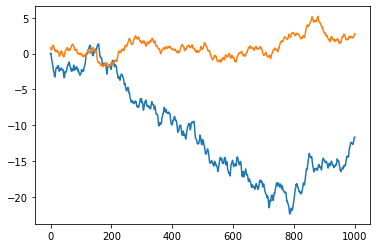

In [6]:
plt.plot(traj_dict['coordinates'][:,0,0])
plt.plot(traj_dict['coordinates'][:,1,0])
plt.show()

In [7]:
distance = msm.distance(traj_dict, selection=0, selection_2=1, pbc=True)

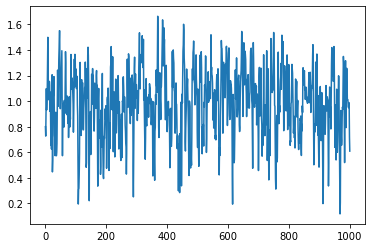

In [8]:
plt.plot(distance[:,0,0])
plt.show()

In [9]:
traj_dict_wrapped = msm.wrap_to_pbc(traj_dict)

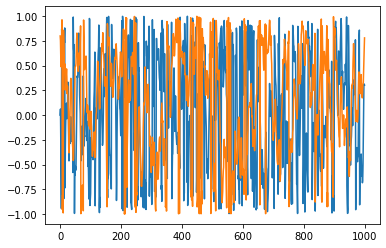

In [10]:
plt.plot(traj_dict_wrapped['coordinates'][:,0,0])
plt.plot(traj_dict_wrapped['coordinates'][:,1,0])
plt.show()

In [11]:
distance_wrapped = msm.distance(traj_dict_wrapped, selection=0, selection_2=1, pbc=True)

In [12]:
np.all(distance==distance_wrapped) # np.allclose(distance, distance_wrapped)

True

In [13]:
traj_dict_unwrapped = msm.unwrap_from_pbc(traj_dict_wrapped)

In [14]:
np.all(traj_dict_unwrapped['coordinates']==traj_dict['coordinates']) # np.allclose(distance, distance_wrapped)

True

In [15]:
np.allclose(traj_dict_unwrapped['coordinates'][:,0,:], traj_dict['coordinates'][:,0,:])

True